<a href="https://colab.research.google.com/github/KingaKlejne/jdszr3-databusters/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Basic information about dataset:

Original datasets are in the following files:

- train.pickle

- valid.pickle

- test.pickle

Resulted preprocessed nine files are as follows:

- data0.pickle - Shuffling

- data1.pickle - Shuffling, /255.0 Normalization

- data2.pickle - Shuffling, /255.0 + Mean Normalization

- data3.pickle - Shuffling, /255.0 + Mean + STD Normalization

- data4.pickle - Grayscale, Shuffling

- data5.pickle - Grayscale, Shuffling, Local Histogram Equalization

- data6.pickle - Grayscale, Shuffling, Local Histogram Equalization, /255.0 Normalization

- data7.pickle - Grayscale, Shuffling, Local Histogram Equalization, /255.0 + Mean Normalization

- data8.pickle - Grayscale, Shuffling, Local Histogram Equalization, /255.0 + Mean + STD Normalization

Datasets data0 - data3 have RGB images and datasets data4 - data8 have Gray images.


Shapes of data0 - data3 are as following (RGB):

- xtrain: (86989, 3, 32, 32) 
- ytrain: (86989,)

- xvalidation: (4410, 3, 32, 32) 
- yvalidation: (4410,)

- xtest: (12630, 3, 32, 32) 
- ytest: (12630,)


Shapes of data4 - data8 are as following (Gray):

- xtrain: (86989, 1, 32, 32) 
- ytrain: (86989,)

- xvalidation: (4410, 1, 32, 32) 
- yvalidation: (4410,)

- xtest: (12630, 1, 32, 32) 
- ytest: (12630,)


mean image and standard deviation were calculated from train dataset and applied to validation and testing datasets for appropriate datasets. When using user's image for classification, it has to be preprocessed firstly in the same way and in the same order according to the chosen dataset among nine.

**Test online**

Experiment online with custom Traffic Sign here: https://valentynsichkar.name/traffic_signs.html

**Acknowledgements**

Initial data is German Traffic Sign Recognition Benchmarks (GTSRB).

**Classes:** 43

**Amount:** 86989 examples. 

# 1. Accesing Google Drive

In [1]:
#Accessing files from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Imports

In [2]:
#Imports
import os
import pandas as pd
import torch
from albumentations import Compose, ShiftScaleRotate, Resize, Blur, HorizontalFlip, Normalize, ElasticTransform
import numpy as np
from albumentations.pytorch import ToTensor
import matplotlib.pyplot as plt
import pickle

# 3. Importing files

In [ ]:
#check if it works
# df = pd.read_pickle('/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data2.pickle')

In [3]:
root_dir = '/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/'

for dirname, _, filenames in os.walk(root_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data0.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data1.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data2.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data3.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data4.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data5.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data6.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data7.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/data8.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/test.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/std_gray.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/mean_image_gray.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/labels.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/Data/std_rgb.pickle
/content/drive/MyDrive/DATABUSTERS/DEEP LEARNIN

In [4]:
train = pickle.load(open(root_dir + 'train.pickle', 'rb'))
valid = pickle.load(open(root_dir + 'valid.pickle', 'rb'))
test = pickle.load(open(root_dir + 'test.pickle', 'rb'))
labels = pickle.load(open(root_dir + 'labels.pickle', 'rb'))
std_gray = pickle.load(open(root_dir + 'std_gray.pickle', 'rb'))
std_rgb = pickle.load(open(root_dir + 'std_rgb.pickle', 'rb'))
mean_gray = pickle.load(open(root_dir + 'mean_image_gray.pickle', 'rb'))
mean_rgb = pickle.load(open(root_dir + 'mean_image_rgb.pickle', 'rb'))
data_rgb = pickle.load(open(root_dir + 'data3.pickle', 'rb'))
data_gray = pickle.load(open(root_dir + 'data8.pickle', 'rb'))

# 4. EDA

In [ ]:
label_names = pd.read_csv(root_dir + 'label_names.csv')
label_names.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [ ]:
print(f'Number of classes: {len(label_names)}')

Number of classes: 43


In [ ]:
unique = label_names['SignName'].unique()
print(f'Names of classes: {unique}')

Names of classes: ['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road'
 'Slippery road' 'Road narrows on the right' 'Road work' 'Traffic signals'
 'Pedestrians' 'Children crossing' 'Bicycles crossing'
 'Beware of ice/snow' 'Wild animals crossing'
 'End of all speed and passing limits' 'Turn right ahead'
 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' 'Keep left' 'Roundabout mandatory'
 'End of no passing' 'End of no passing by vehicles over 3.5 metric tons']


# 5. Data split

In [5]:
X_train = train['features']
y_train = train['labels']
X_valid = valid['features']
y_valid = valid['labels']
X_test = test['features']
y_test = test['labels']

X_train_gray = data_gray['x_train']
y_train_gray = data_gray['y_train']
X_valid_gray = data_gray['x_validation']
y_valid_gray = data_gray['y_validation']
X_test_gray = data_gray['x_test']
y_test_gray = data_gray['y_test']

X_train_rgb = data_rgb['x_train']
y_train_rgb = data_rgb['y_train']
X_valid_rgb = data_rgb['x_validation']
y_valid_rgb = data_rgb['y_validation']
X_test_rgb = data_rgb['x_test']
y_test_rgb = data_rgb['y_test']

#changing shape, as axes are at different position
X_train_gray = X_train_gray.swapaxes(1,3)
X_valid_gray = X_valid_gray.swapaxes(1,3)
X_test_gray = X_test_gray.swapaxes(1,3)

X_train_rgb = X_train_rgb.swapaxes(1,3)
X_valid_rgb = X_valid_rgb.swapaxes(1,3)
X_test_rgb = X_test_rgb.swapaxes(1,3)

In [ ]:
def shapes(X, y):
    print("X: ", X.shape)
    print("y: ", y.shape)
    

shapes(X_train, y_train)
shapes(X_valid, y_valid)
shapes(X_test, y_test)

X:  (34799, 32, 32, 3)
y:  (34799,)
X:  (4410, 32, 32, 3)
y:  (4410,)
X:  (12630, 32, 32, 3)
y:  (12630,)


In [ ]:
#creating dataframe for labels from test set
df_train = pd.DataFrame(data = train['labels'], columns = ['ClassId'])
#merging tables
df_labels = pd.merge(df_train, label_names, on='ClassId', how='left').reset_index(drop=True)
#grouping data
df_labels = df_labels.groupby(by=['SignName'])
#sum data
df_labels = df_labels.count()

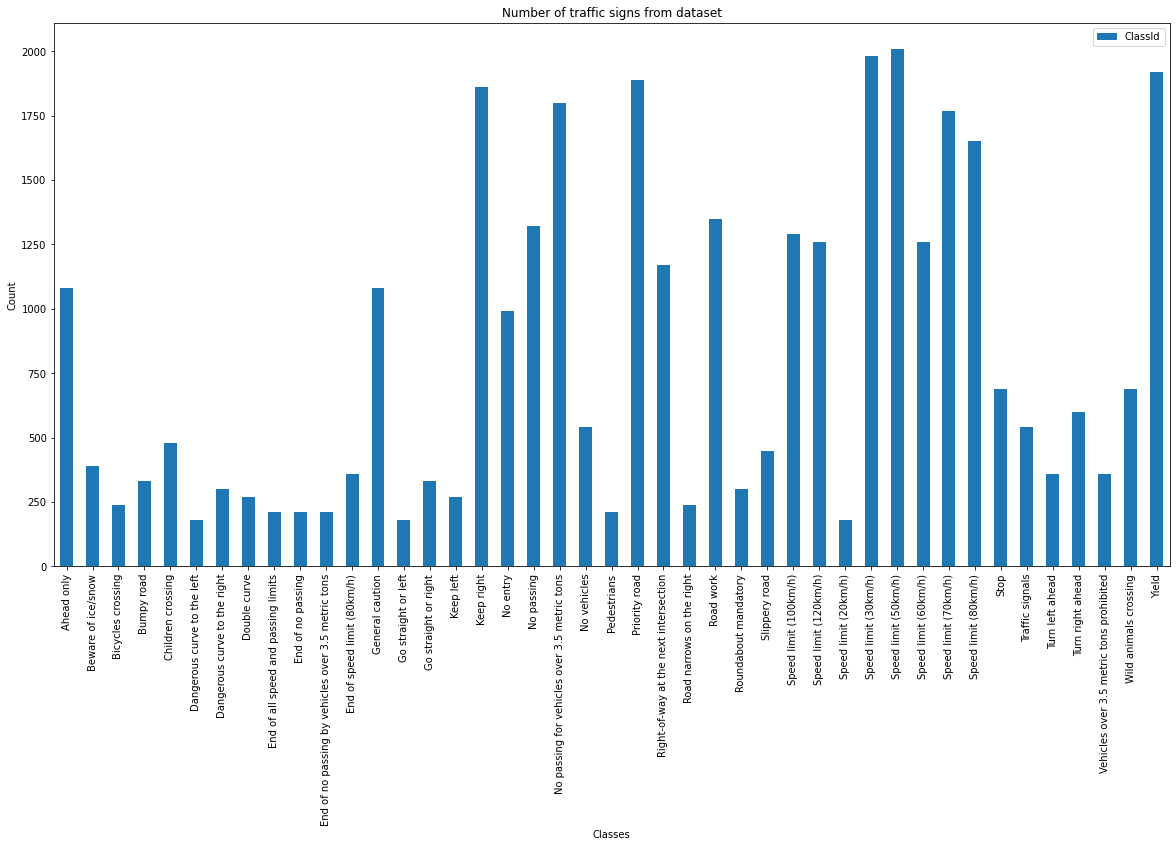

In [ ]:
#how many samples of each class plot
df_labels.plot(kind = 'bar', figsize=(20, 10), xlabel = 'Classes', ylabel = 'Count')
plt.title('Number of traffic signs from dataset')
plt.show()

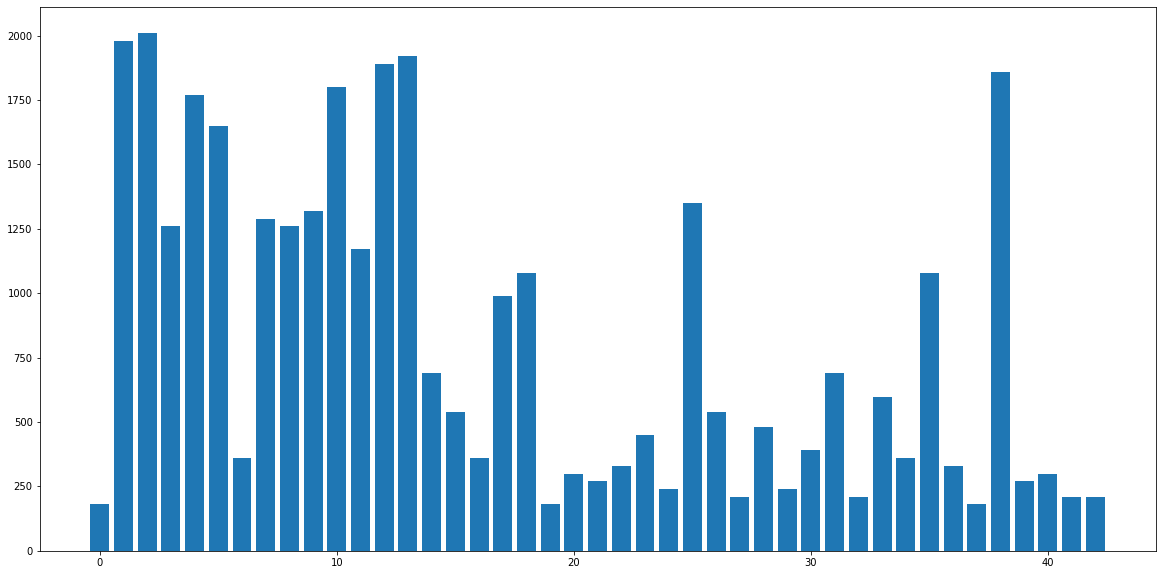

In [ ]:
# how many samples of each class
junik, counts = np.unique(y_train, return_counts=True)
# plotting
fig = plt.figure(figsize = (20,10))
plt.bar(junik,counts)
plt.show()

# 6.Showing pictures

In [ ]:
# class and function to show pictures

class TrafficSignsDataset(torch.utils.data.Dataset):

    def __init__(self, images, labels, num_classes, transform=None):
        
        self.images = images
        self.labels = labels
        self.C = num_classes
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img = self.images[idx]
        label_idx = self.labels[idx]

        label = np.zeros(self.C)
        label[label_idx] = 1
        
        augmented = self.transform(image=img)
        img = augmented['image']
            
        label = torch.tensor(label)
        
        return {'image': img, 'label': label}

def show_pictures(X,y):

  MEANS = np.mean(X_train, axis=(0, 1, 2)) / 255.
  STDS = np.std(X_train, axis=(0, 1, 2)) / 255.

  BATCH_SIZE = 128
  NUM_CLASSES = 43

  transform_train = Compose([
      Normalize(mean=MEANS, std=STDS),
      Blur(blur_limit=3, p=0.1),
      ShiftScaleRotate(rotate_limit=30, p=0.3),
      ElasticTransform(p=0.1),
      ToTensor()
  ])

  transform_test = Compose([
      Normalize(mean=MEANS, std=STDS),
      ToTensor()
  ])

  dataset = TrafficSignsDataset(X, y, NUM_CLASSES, transform=transform_train)

  data_loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)


  batch = next(iter(data_loader))
  fig, axs = plt.subplots(1, 5, figsize=(15,5))

  # print('shape', batch['image'].shape)
  # print('min', batch['image'].min())
  # print('max', batch['image'].max())
  # print('mean', batch['image'].mean())
  # print('std', batch['image'].std())

  for i in np.arange(5):
      img = np.transpose(batch['image'][i].numpy(), (1,2,0))
      img = img * STDS + MEANS
      sign = label_names[label_names.ClassId == torch.argmax(batch['label'][i]).item()]['SignName'].values[0]
      axs[i].imshow(img)
      axs[i].set_title(sign)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


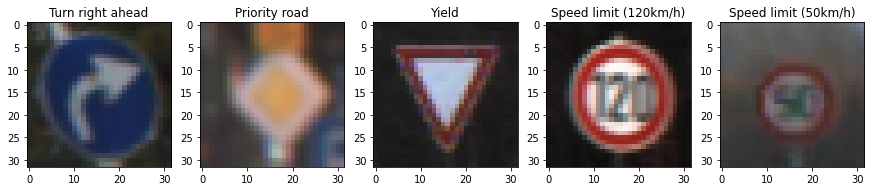

In [ ]:
#plotting train set
show_pictures(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


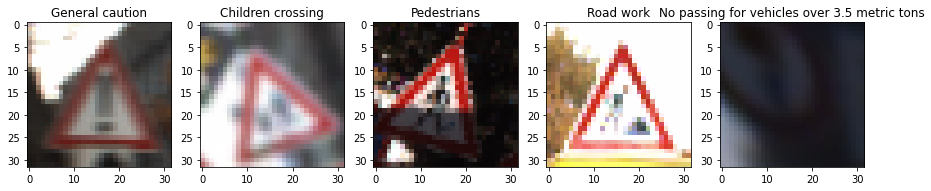

In [ ]:
#plotting test set
show_pictures(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


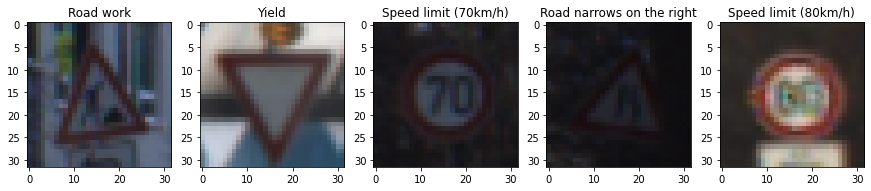

In [ ]:
#plotting validation set
show_pictures(X_valid, y_valid)

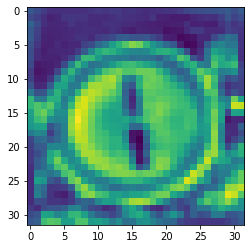

In [ ]:
#gray data
plt.imshow(X_train_gray[1000].squeeze())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


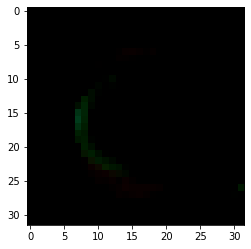

In [ ]:
#rgb data
plt.imshow(X_train_rgb[1000].squeeze())

# 7. Normalization

In [6]:
#normalize to range 0-1:
X_train = X_train /255.0
X_test = X_test /255.0
X_valid = X_valid /255.0

X_train_gray = X_train_gray /255.0
X_test_gray = X_test_gray /255.0
X_valid_gray = X_valid_gray /255.0

X_train_rgb = X_train_rgb /255.0
X_test_rgb = X_test_rgb /255.0
X_valid_rgb = X_valid_rgb /255.0


In [ ]:
# # one hot encode target values:
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# y_valid = to_categorical(y_valid)

# y_train_gray = to_categorical(y_train_gray)
# y_test_gray = to_categorical(y_test_gray)
# y_valid_gray = to_categorical(y_valid_gray)

# y_train_rgb = to_categorical(y_train_rgb)
# y_test_rgb = to_categorical(y_test_rgb)
# y_valid_rgb = to_categorical(y_valid_rgb)

In [7]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train,43)
y_test = np_utils.to_categorical(y_test,43)
y_valid = np_utils.to_categorical(y_valid,43)

y_train_gray = np_utils.to_categorical(y_train_gray,43)
y_test_gray = np_utils.to_categorical(y_test_gray,43)
y_valid_gray = np_utils.to_categorical(y_valid_gray,43)

y_train_rgb = np_utils.to_categorical(y_train_rgb,43)
y_test_rgb = np_utils.to_categorical(y_test_rgb,43)
y_valid_rgb = np_utils.to_categorical(y_valid_rgb,43)

# 8.CNN Model

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, MaxPooling2D
from keras.models import Sequential, load_model
from keras.utils.vis_utils import plot_model
from keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import h5py
import math
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same',
                input_shape=X_test.shape[1:],
                activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 256)       590080    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 256)       590080    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
# h = [0] * len(model)

def lr_exp_decay(epoch, lr):
    k = 0.1
    return lr * math.exp(-k*epoch)

#ds_callback_lr = LearningRateScheduler(lr_exp_decay, verbose=1)
ds_callback_es = EarlyStopping(patience=5)

my_callbacks = [
    ds_callback_es,
    # ds_callback_lr,
    tf.keras.callbacks.ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max'), 
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
!nvidia-smi

Thu Aug  5 21:14:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    28W /  70W |    236MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
history = model.fit(X_train, y_train,
              batch_size = 32, 
              epochs = 50,
              validation_data = (X_valid, y_valid), 
              shuffle = True,
              callbacks=my_callbacks 
              )

Epoch 1/50
1088/1088 [==============================] - 76s 27ms/step - loss: 3.0054 - accuracy: 0.2041 - val_loss: 0.7604 - val_accuracy: 0.7732

Epoch 00001: val_accuracy improved from -inf to 0.77324, saving model to model_weights.h5
Epoch 2/50
1088/1088 [==============================] - 27s 25ms/step - loss: 0.5557 - accuracy: 0.8312 - val_loss: 0.2256 - val_accuracy: 0.9392

Epoch 00002: val_accuracy improved from 0.77324 to 0.93923, saving model to model_weights.h5
Epoch 3/50
1088/1088 [==============================] - 27s 25ms/step - loss: 0.1624 - accuracy: 0.9510 - val_loss: 0.1515 - val_accuracy: 0.9605

Epoch 00003: val_accuracy improved from 0.93923 to 0.96054, saving model to model_weights.h5
Epoch 4/50
1088/1088 [==============================] - 28s 25ms/step - loss: 0.0813 - accuracy: 0.9757 - val_loss: 0.2191 - val_accuracy: 0.9585

Epoch 00004: val_accuracy did not improve from 0.96054
Epoch 5/50
1088/1088 [==============================] - 28s 26ms/step - loss: 0.0

In [ ]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

395/395 [==============================] - 4s 10ms/step - loss: 0.1574 - accuracy: 0.9766
Test loss: 0.15735962986946106
Test accuracy: 0.9765637516975403


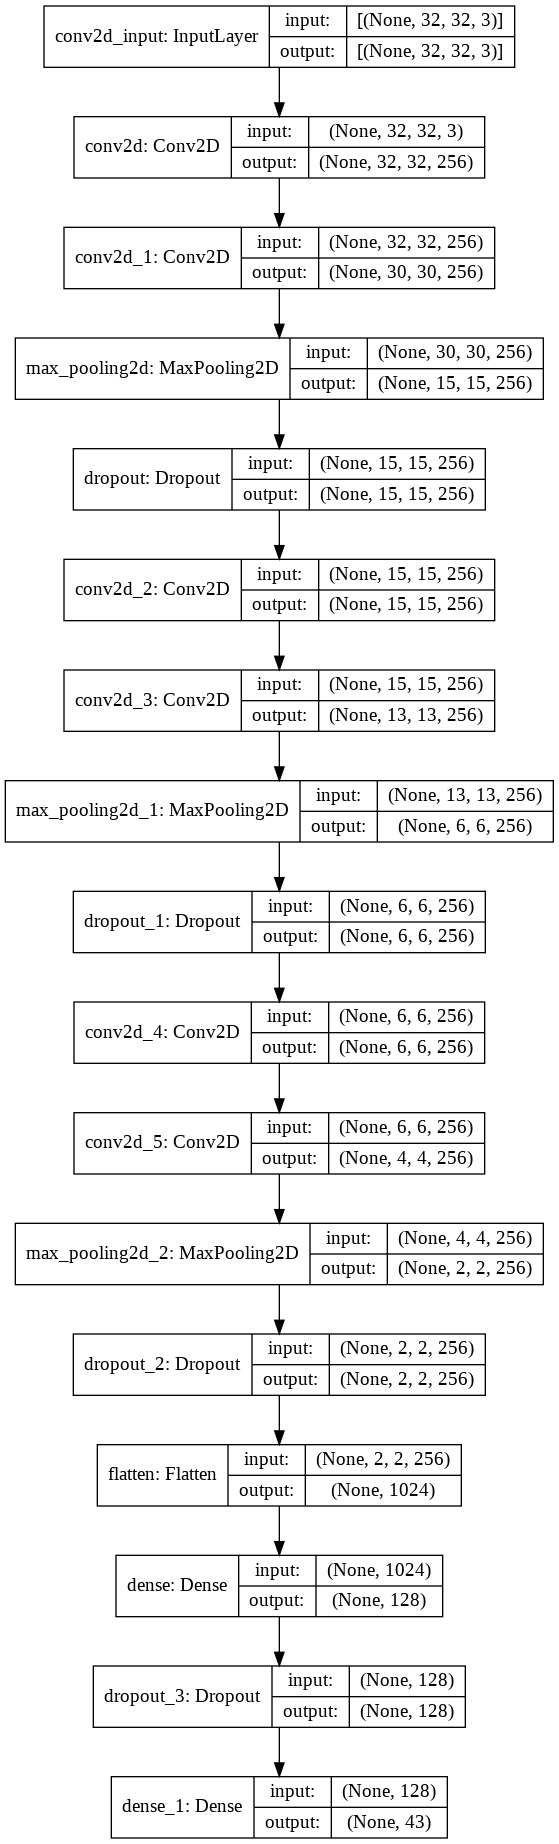

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# def define_model():
#   model = Sequential()

#   model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same',
#                   input_shape=X_test.shape[1:],
#                   activation='relu'))
#   model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
#   model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(Dropout(0.25))

#   model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
#   model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
#   model.add(MaxPooling2D(pool_size=(2, 2)))
#   model.add(Dropout(0.25))

#   model.add(Flatten())
#   model.add(Dense(units=512, activation='relu'))
#   model.add(Dropout(0.5))
#   model.add(Dense(43, activation='softmax'))

#   model.summary()

#   model.compile(optimizer=RMSprop(lr=0.0001),
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

#   return model

In [ ]:
#serialize model structure to JSON
# finally we use H5 format
# model_json = LeNet.to_json()
# with open("LeNet.json", "w") as json_file: 
#   json_file.write(model_json) 

In [ ]:
# Calling `save('my_model.h5')` creates a h5 file `my_model.h5`.
model.save("my_h5_model.h5")

# It can be used to reconstruct the model identically.
# reconstructed_model = keras.models.load_model("my_h5_model.h5")

# 9. Plotting results

In [10]:
def make_accuracy_plot(history):
    """
    The function returns plot of the model's accuracy on the training and validation set.
    """
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Training accuracy', marker='o')
    plt.plot(epochs, val_acc, label='Validation accuracy', marker='o')
    plt.legend()
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

def make_loss_plot(history):
    """
    The function returns the model loss plot on the training and validation set.
    """
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Training loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation loss', marker='o')
    plt.legend()
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

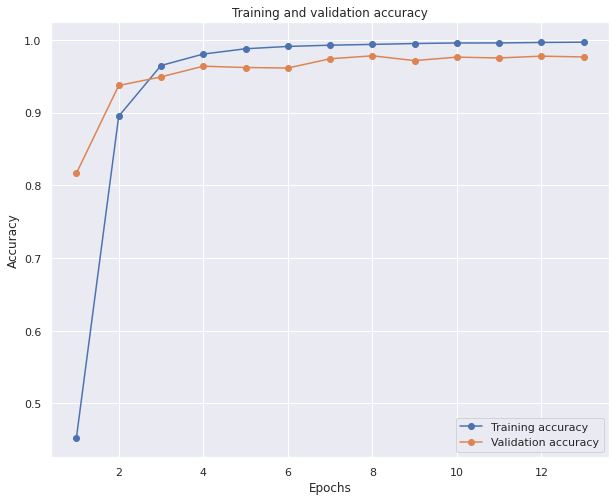

In [ ]:
make_accuracy_plot(history)

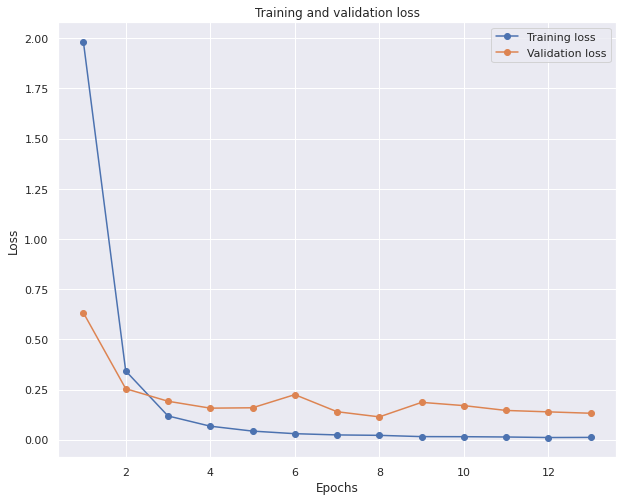

In [ ]:
make_loss_plot(history)

# 10. Confusion matrix

In [ ]:
#Confusion matrix needs both labels & predictions as single-digits, not as one-hot encoded vectors,
#hence added rounded_predictions
rounded_predictions = model.predict_classes(X_test, batch_size=128, verbose=0)
#test_labels are still one-hot encoded, hence convert them too to single-digit ones, as follows:
rounded_labels=np.argmax(y_test, axis=1)
#creating confusion matrix
cm = confusion_matrix(rounded_labels, rounded_predictions)
#creating classes names:
label_names_list = label_names['SignName'].values.tolist()

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
df = pd.DataFrame(data = [rounded_labels, rounded_predictions])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12590,12591,12592,12593,12594,12595,12596,12597,12598,12599,12600,12601,12602,12603,12604,12605,12606,12607,12608,12609,12610,12611,12612,12613,12614,12615,12616,12617,12618,12619,12620,12621,12622,12623,12624,12625,12626,12627,12628,12629
0,16,1,38,33,11,38,18,12,25,35,12,7,23,7,4,9,21,20,27,38,4,33,9,3,1,11,13,10,9,11,5,17,34,23,2,17,3,12,16,8,...,25,5,22,3,12,25,13,10,35,10,35,38,24,13,35,25,38,1,18,7,35,11,39,8,0,10,18,31,8,31,13,5,12,35,25,12,33,6,7,10
1,16,1,38,33,11,38,18,12,25,35,12,7,23,7,4,9,21,20,27,38,4,33,9,3,1,11,13,10,9,11,5,17,34,23,2,17,3,12,16,8,...,25,5,22,3,12,25,13,10,35,10,35,38,24,13,35,25,38,1,18,7,35,11,39,8,0,10,1,31,8,31,13,5,12,35,25,12,33,5,7,10


In [ ]:
print(classification_report(rounded_labels, rounded_predictions, target_names=label_names_list))


                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      1.00      1.00        60
                              Speed limit (30km/h)       0.95      0.99      0.97       720
                              Speed limit (50km/h)       0.99      1.00      0.99       750
                              Speed limit (60km/h)       0.98      0.97      0.98       450
                              Speed limit (70km/h)       1.00      0.98      0.99       660
                              Speed limit (80km/h)       0.94      0.97      0.95       630
                       End of speed limit (80km/h)       1.00      0.84      0.91       150
                             Speed limit (100km/h)       0.98      1.00      0.99       450
                             Speed limit (120km/h)       0.99      0.99      0.99       450
                                        No passing       0.99      1.00      0.

In [ ]:
#plot function
def plot_confusion_matrix(cm):
    # Mulitclass classification, 43 classes
    cm = cm[::-1]
    classes = label_names_list
    cm = pd.DataFrame(cm, columns=classes, index=classes[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=1000, height=1000, title='Confusion Matrix', font_size=10)
    fig.show()

import plotly.figure_factory as ff
plot_confusion_matrix(cm)

# 11. Misclassified images - Reults

Showing results of missmatching signes to verify the risks from model.

For example, if the model would be used by Full Self-Driving cars, we don't want to miss some relevant signs, as it could have huge consequences and we want to avoid that.

In [ ]:
pred = model.predict(X_test)

# init
wrong = np.array([])

for k in range(pred.shape[0]):
    ClassId_pred = np.argmax(pred[k])
    ClassId_true= np.argmax(y_test[k])
    if ClassId_pred != ClassId_true: 
        wrong = np.append(wrong, k)
        
print("Number of wrong predictions: ", wrong.size)
print("Percentage if wrong predictions: {0:.3f}".format((wrong.size/pred.shape[0])*100), "%")

Number of wrong predictions:  296
Percentage if wrong predictions: 2.344 %


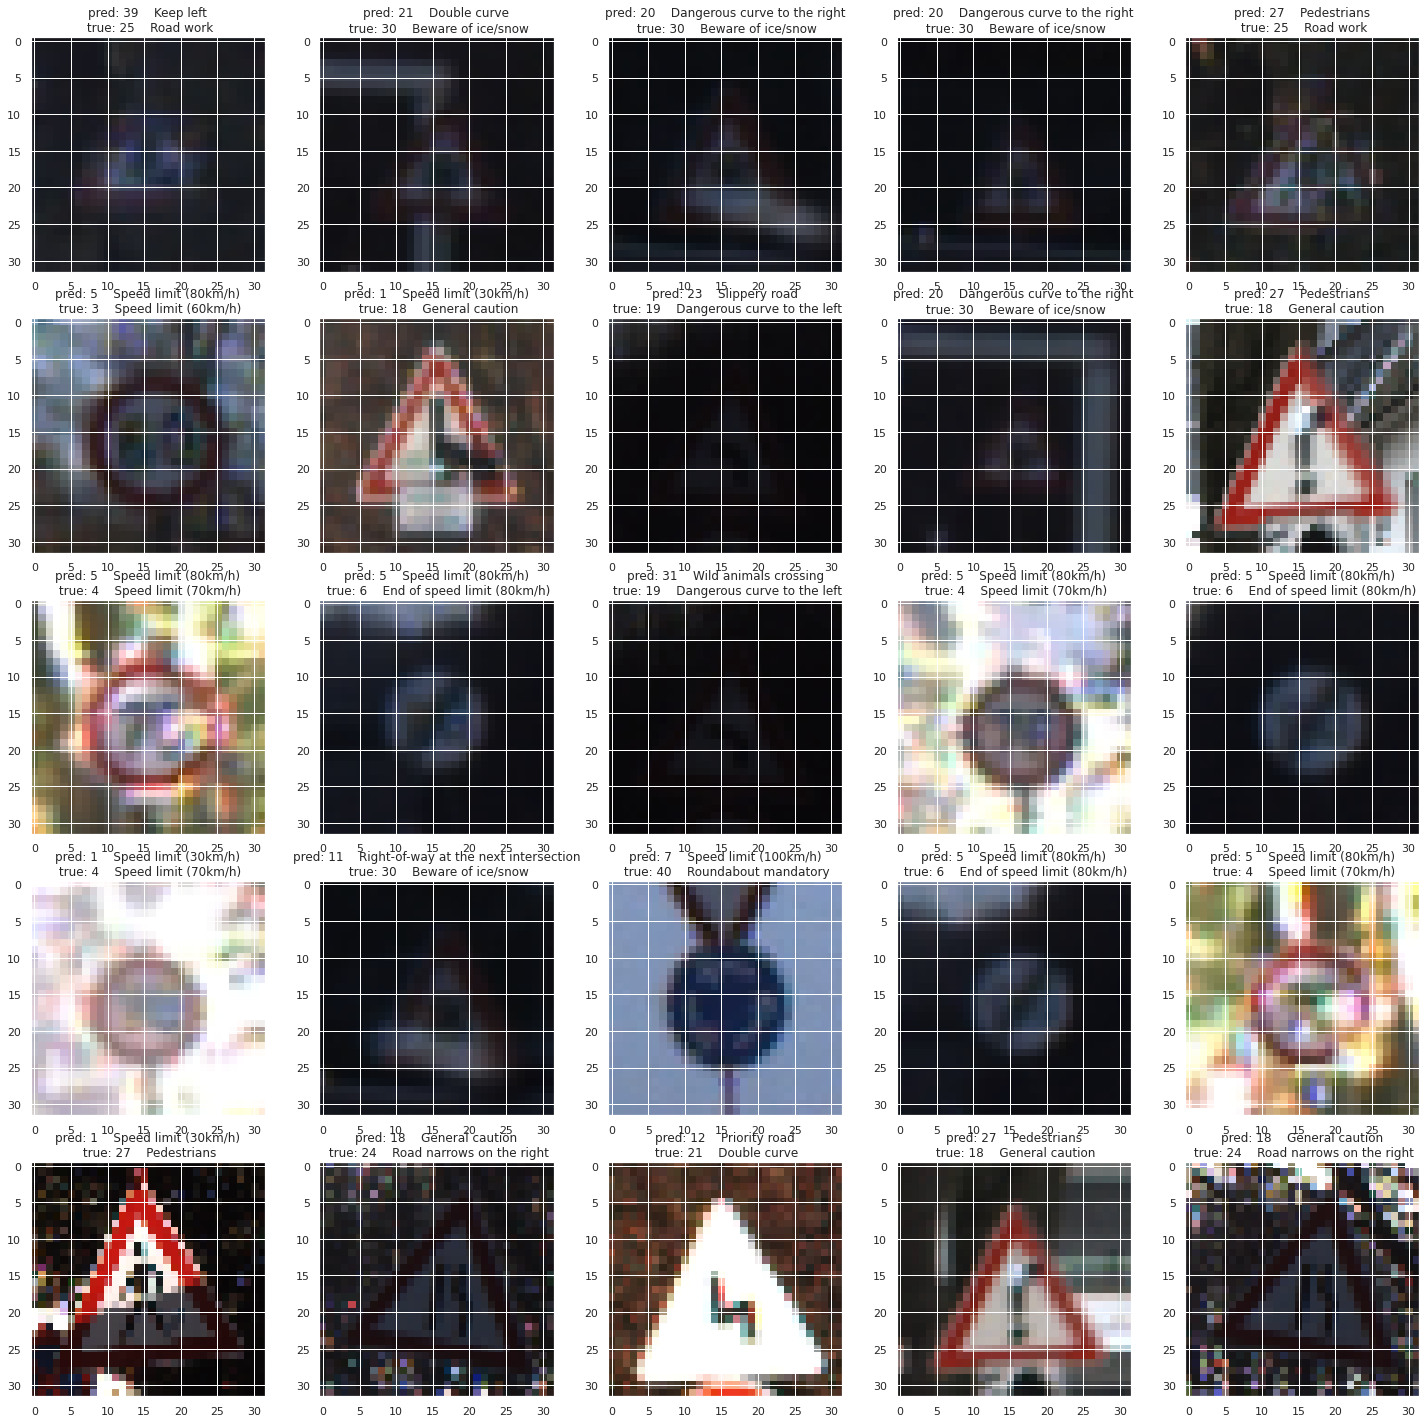

In [ ]:
rows = 5
cols = 5

fig, axs = plt.subplots(rows,cols, figsize = (25,25))

for i in range(rows):
    for j in range(cols):
            ClassId_pred = np.argmax(pred[int(wrong[rows*i+j])])
            label_pred = label_names[label_names["ClassId"] == ClassId_pred]["SignName"].to_string()
            ClassId_true= np.argmax(y_test[int(wrong[rows*i+j])])
            label_true = label_names[label_names["ClassId"] == ClassId_true]["SignName"].to_string()
            axs[i,j].imshow(X_test[int(wrong[rows*i+j])])
            axs[i,j].set_title("pred: "+label_pred+"\n true: "+label_true)
    
fig.show()

In [ ]:
#creating dataframe for labels from test set
df_test = pd.DataFrame(data = test['labels'], columns = ['ClassId'])
#merging tables
df_labels = pd.merge(df_test, label_names, on='ClassId', how='inner').reset_index(drop=True)
#renaming of column 'ClassId'
df_labels.columns = ['y_true', 'SignName']
#removing duplicates
df_labels = df_labels.drop_duplicates()
#creating new data frame for errors
errors = pd.DataFrame({'y_true': rounded_labels, 'y_pred': rounded_predictions})
#merge with labels to know which signes were incorrectly classified
errors = pd.merge(errors, df_labels, on='y_true', how='left').reset_index(drop=True)
#showing which labels were incorrectly classified
errors['is_incorrect'] = (errors['y_true'] != errors['y_pred']) * 1
#creating another value for only misclassified items
misclassified = errors.loc[errors['is_incorrect'] == 1]

In [ ]:
#Names of misclassified images
misclassified['SignName'].unique()

array(['Road work', 'Beware of ice/snow', 'Speed limit (60km/h)',
       'General caution', 'Dangerous curve to the left',
       'Speed limit (70km/h)', 'End of speed limit (80km/h)',
       'Roundabout mandatory', 'Pedestrians', 'Road narrows on the right',
       'Double curve', 'Speed limit (80km/h)', 'Priority road',
       'Traffic signals', 'Bumpy road', 'Speed limit (100km/h)',
       'Go straight or right', 'Speed limit (50km/h)',
       'End of no passing', 'Right-of-way at the next intersection',
       'Slippery road', 'Speed limit (120km/h)', 'Yield',
       'Children crossing', 'No vehicles', 'Keep left',
       'End of no passing by vehicles over 3.5 metric tons',
       'No passing for vehicles over 3.5 metric tons',
       'Wild animals crossing', 'Speed limit (30km/h)', 'No passing'],
      dtype=object)

In [ ]:
#number of misclassified images
len(errors.loc[errors['is_incorrect'] == 1])

296

In [ ]:
def drop_data(data, columns):
    """ as a 'columns', provide a list of columns' names
    """
    data.drop(columns, axis='columns', inplace=True)

In [ ]:
#removing columns
drop_data(misclassified, ['y_true', 'y_pred'])

In [ ]:
#grouping data
misclassified_grouped = misclassified.groupby(by=['SignName'])
#sum data
misclassified_grouped_sum = misclassified_grouped.sum()
# misclassified_grouped_sum 

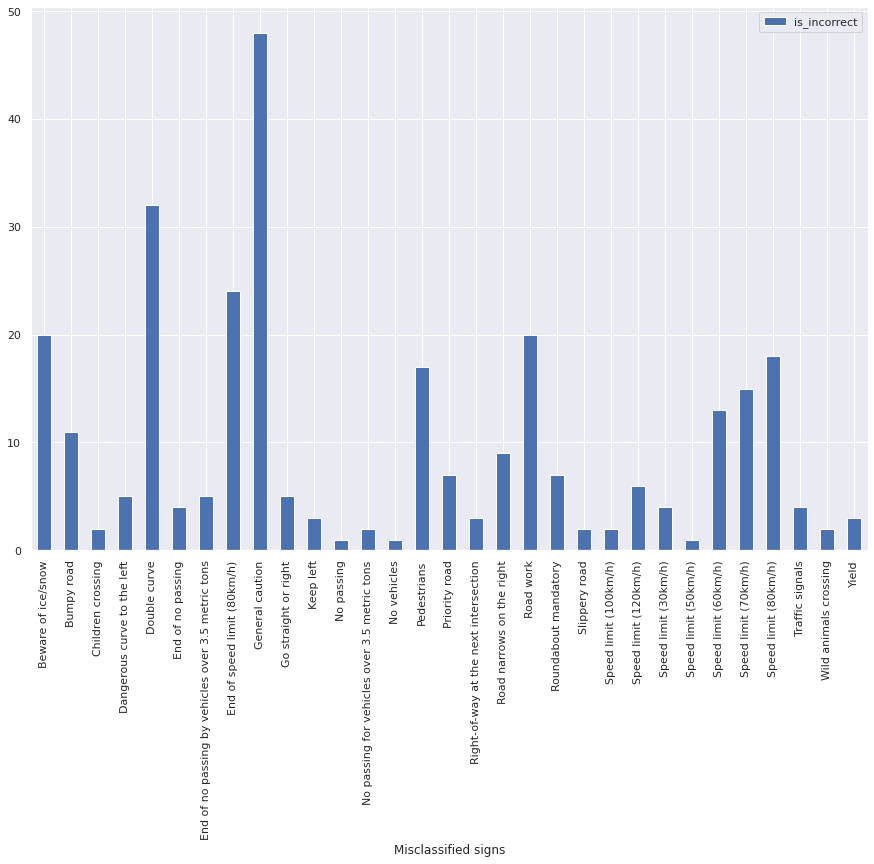

In [ ]:
#plotting results to see what signes were missmatched most commonly
misclassified_grouped_sum.plot(kind = 'bar', figsize=(15, 10), xlabel = 'Misclassified signs')

#12. Model - RGB

In [11]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/DATABUSTERS/DEEP LEARNING/my_h5_model.h5')

In [12]:
model.compile(optimizer=RMSprop(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
history = model.fit(X_train_rgb, y_train_rgb,
              batch_size = 32, 
              epochs = 20,
              validation_data = (X_valid_rgb, y_valid_rgb), 
              shuffle = True,
              callbacks=my_callbacks 
              )

Epoch 1/20
2719/2719 [==============================] - 104s 26ms/step - loss: 0.6515 - accuracy: 0.8153 - val_loss: 0.1421 - val_accuracy: 0.9624

Epoch 00001: val_accuracy improved from -inf to 0.96236, saving model to model_weights.h5
Epoch 2/20
2719/2719 [==============================] - 69s 25ms/step - loss: 0.1252 - accuracy: 0.9639 - val_loss: 0.0887 - val_accuracy: 0.9726

Epoch 00002: val_accuracy improved from 0.96236 to 0.97256, saving model to model_weights.h5
Epoch 3/20
2719/2719 [==============================] - 69s 25ms/step - loss: 0.0690 - accuracy: 0.9796 - val_loss: 0.1173 - val_accuracy: 0.9728

Epoch 00003: val_accuracy improved from 0.97256 to 0.97279, saving model to model_weights.h5
Epoch 4/20
2719/2719 [==============================] - 69s 25ms/step - loss: 0.0485 - accuracy: 0.9858 - val_loss: 0.1243 - val_accuracy: 0.9796

Epoch 00004: val_accuracy improved from 0.97279 to 0.97959, saving model to model_weights.h5
Epoch 5/20
2719/2719 [====================

In [14]:
score = model.evaluate(X_test_rgb, y_test_rgb)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

395/395 [==============================] - 4s 10ms/step - loss: 0.1441 - accuracy: 0.9730
Test loss: 0.1440880298614502
Test accuracy: 0.9730007648468018


# 13. Model - Gray

In [21]:
model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same',
                input_shape=X_test_gray.shape[1:],
                activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(43, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 256)       2560      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 256)       590080    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 256)       590080    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 256)        

In [22]:
model.compile(optimizer=RMSprop(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [23]:
history = model.fit(X_train_gray, y_train_gray,
              batch_size = 32, 
              epochs = 20,
              validation_data = (X_valid_gray, y_valid_gray), 
              shuffle = True,
              callbacks=my_callbacks 
              )

Epoch 1/20
2719/2719 [==============================] - 74s 27ms/step - loss: 3.0012 - accuracy: 0.2118 - val_loss: 0.5198 - val_accuracy: 0.8338

Epoch 00001: val_accuracy did not improve from 0.98231
Epoch 2/20
2719/2719 [==============================] - 71s 26ms/step - loss: 0.5635 - accuracy: 0.8386 - val_loss: 0.2921 - val_accuracy: 0.9041

Epoch 00002: val_accuracy did not improve from 0.98231
Epoch 3/20
2719/2719 [==============================] - 71s 26ms/step - loss: 0.2449 - accuracy: 0.9317 - val_loss: 0.1555 - val_accuracy: 0.9592

Epoch 00003: val_accuracy did not improve from 0.98231
Epoch 4/20
2719/2719 [==============================] - 71s 26ms/step - loss: 0.1407 - accuracy: 0.9604 - val_loss: 0.1337 - val_accuracy: 0.9630

Epoch 00004: val_accuracy did not improve from 0.98231
Epoch 5/20
2719/2719 [==============================] - 70s 26ms/step - loss: 0.0962 - accuracy: 0.9723 - val_loss: 0.1394 - val_accuracy: 0.9676

Epoch 00005: val_accuracy did not improve fro

In [24]:
score = model.evaluate(X_test_gray, y_test_gray)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

395/395 [==============================] - 4s 10ms/step - loss: 0.2346 - accuracy: 0.9601
Test loss: 0.2345881313085556
Test accuracy: 0.9600949883460999


# 14. Transfer Learning

In [25]:
import tensorflow as tf
import tensorflow_hub as hub

In [26]:
model = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b2/classification/1",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(43, activation='softmax')
])
model.build([None, 32, 32, 3])  # Batch input shape.



#https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1

In [27]:
from tensorflow import keras

# opt = keras.optimizers.Adam(learning_rate=0.01)
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train,
                   batch_size=32,
                   epochs=20,
                   validation_data=(X_valid, y_valid),
                   shuffle=True)

Epoch 1/20
1088/1088 [==============================] - 33s 20ms/step - loss: 3.5300 - accuracy: 0.1030 - val_loss: 3.4844 - val_accuracy: 0.1215
Epoch 2/20
1088/1088 [==============================] - 21s 19ms/step - loss: 3.3831 - accuracy: 0.1451 - val_loss: 3.4279 - val_accuracy: 0.1274
Epoch 3/20
1088/1088 [==============================] - 20s 18ms/step - loss: 3.3236 - accuracy: 0.1491 - val_loss: 3.3814 - val_accuracy: 0.1259
Epoch 4/20
1088/1088 [==============================] - 20s 18ms/step - loss: 3.2759 - accuracy: 0.1518 - val_loss: 3.3397 - val_accuracy: 0.1322
Epoch 5/20
1088/1088 [==============================] - 21s 19ms/step - loss: 3.2346 - accuracy: 0.1597 - val_loss: 3.3032 - val_accuracy: 0.1338
Epoch 6/20
1088/1088 [==============================] - 19s 18ms/step - loss: 3.1983 - accuracy: 0.1640 - val_loss: 3.2702 - val_accuracy: 0.1415
Epoch 7/20
1088/1088 [==============================] - 19s 17ms/step - loss: 3.1658 - accuracy: 0.1671 - val_loss: 3.2412 -

In [29]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

395/395 [==============================] - 7s 17ms/step - loss: 2.9533 - accuracy: 0.1946
Test loss: 2.953261613845825
Test accuracy: 0.19461598992347717


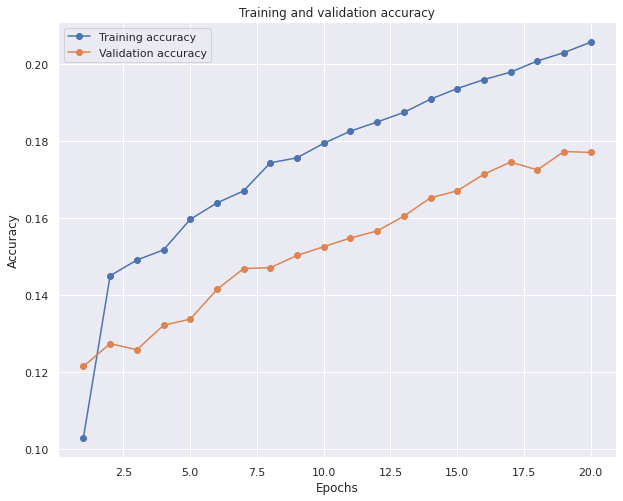

In [30]:
make_accuracy_plot(history)

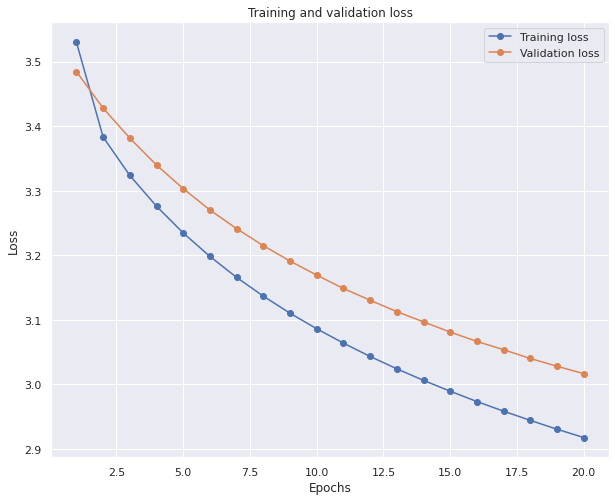

In [31]:
make_loss_plot(history)

# 15. 5 samples

In [11]:
import collections

#showing how many pictures are under specific label
collections.Counter(train['labels'])

Counter({0: 180,
         1: 1980,
         2: 2010,
         3: 1260,
         4: 1770,
         5: 1650,
         6: 360,
         7: 1290,
         8: 1260,
         9: 1320,
         10: 1800,
         11: 1170,
         12: 1890,
         13: 1920,
         14: 690,
         15: 540,
         16: 360,
         17: 990,
         18: 1080,
         19: 180,
         20: 300,
         21: 270,
         22: 330,
         23: 450,
         24: 240,
         25: 1350,
         26: 540,
         27: 210,
         28: 480,
         29: 240,
         30: 390,
         31: 690,
         32: 210,
         33: 599,
         34: 360,
         35: 1080,
         36: 330,
         37: 180,
         38: 1860,
         39: 270,
         40: 300,
         41: 210,
         42: 210})

(array([7200., 4560., 6180., 3510., 2550., 2640., 1470., 1889., 1950.,
        2850.]),
 array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]),
 <a list of 10 Patch objects>)

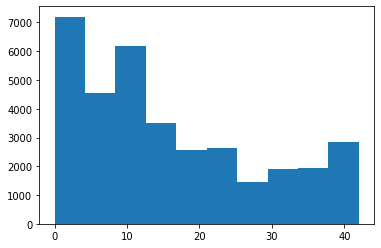

In [12]:
plt.hist(train['labels'],  bins=10)

In [13]:
#showing 5 most common labels
c = collections.Counter(train['labels'])
c.most_common(5)

[(2, 2010), (1, 1980), (13, 1920), (12, 1890), (38, 1860)]

In [14]:
X_2_train = train['features'][train['labels'] == 2]
X_1_train = train['features'][train['labels'] == 1]
X_13_train = train['features'][train['labels'] == 13]
X_12_train = train['features'][train['labels'] == 12]
X_38_train = train['features'][train['labels'] == 38]

In [15]:
X_first_train = np.insert(X_2_train, 0 , X_1_train, axis = 0)
X_second_train = np.insert(X_first_train, 0 , X_13_train, axis = 0)
X_third_train = np.insert(X_second_train, 0 , X_12_train, axis = 0)
X_train_5 = np.insert(X_third_train, 0 , X_38_train, axis = 0)

In [16]:
X_train_5.shape

(9660, 32, 32, 3)

In [17]:
y_2_train = train['labels'][train['labels'] == 2]
y_1_train = train['labels'][train['labels'] == 1]
y_13_train = train['labels'][train['labels'] == 13]
y_12_train = train['labels'][train['labels'] == 12]
y_38_train = train['labels'][train['labels'] == 38]

In [18]:
y_first_train = np.insert(y_2_train, 0 , y_1_train, axis = 0)
y_second_train = np.insert(y_first_train, 0 , y_13_train, axis = 0)
y_third_train = np.insert(y_second_train, 0 , y_12_train, axis = 0)
y_train_5 = np.insert(y_third_train, 0 , y_38_train, axis = 0)

In [19]:
y_train_5.shape

(9660,)

In [20]:
X_2_test = test['features'][test['labels'] == 2]
X_1_test = test['features'][test['labels'] == 1]
X_13_test = test['features'][test['labels'] == 13]
X_12_test = test['features'][test['labels'] == 12]
X_38_test = test['features'][test['labels'] == 38]
X_first_test = np.insert(X_2_test, 0 , X_1_test, axis = 0)
X_second_test = np.insert(X_first_test, 0 , X_13_test, axis = 0)
X_third_test = np.insert(X_second_test, 0 , X_12_test, axis = 0)
X_test_5 = np.insert(X_third_test, 0 , X_38_test, axis = 0)

y_2_test = test['labels'][test['labels'] == 2]
y_1_test = test['labels'][test['labels'] == 1]
y_13_test = test['labels'][test['labels'] == 13]
y_12_test = test['labels'][test['labels'] == 12]
y_38_test = test['labels'][test['labels'] == 38]
y_first_test = np.insert(y_2_test, 0 , y_1_test, axis = 0)
y_second_test = np.insert(y_first_test, 0 , y_13_test, axis = 0)
y_third_test = np.insert(y_second_test, 0 , y_12_test, axis = 0)
y_test_5 = np.insert(y_third_test, 0 , y_38_test, axis = 0)

In [21]:
X_test_5.shape

(3570, 32, 32, 3)

In [22]:
y_test_5.shape

(3570,)

In [23]:
X_2_valid = valid['features'][valid['labels'] == 2]
X_1_valid = valid['features'][valid['labels'] == 1]
X_13_valid = valid['features'][valid['labels'] == 13]
X_12_valid = valid['features'][valid['labels'] == 12]
X_38_valid = valid['features'][valid['labels'] == 38]
X_first_valid = np.insert(X_2_valid, 0 , X_1_valid, axis = 0)
X_second_valid = np.insert(X_first_valid, 0 , X_13_valid, axis = 0)
X_third_valid = np.insert(X_second_valid, 0 , X_12_valid, axis = 0)
X_valid_5 = np.insert(X_third_valid, 0 , X_38_valid, axis = 0)

y_2_valid = valid['labels'][valid['labels'] == 2]
y_1_valid = valid['labels'][valid['labels'] == 1]
y_13_valid = valid['labels'][valid['labels'] == 13]
y_12_valid = valid['labels'][valid['labels'] == 12]
y_38_valid = valid['labels'][valid['labels'] == 38]
y_first_valid = np.insert(y_2_valid, 0 , y_1_valid, axis = 0)
y_second_valid = np.insert(y_first_valid, 0 , y_13_valid, axis = 0)
y_third_valid = np.insert(y_second_valid, 0 , y_12_valid, axis = 0)
y_valid_5 = np.insert(y_third_valid, 0 , y_38_valid, axis = 0)

In [24]:
X_valid_5.shape

(1140, 32, 32, 3)

In [25]:
y_valid_5.shape

(1140,)

In [26]:
y_train.shape

(34799, 43)

In [27]:
y_train_5 = np.where(y_train_5 == 1, 0, y_train_5)
y_train_5 = np.where(y_train_5 == 2, 1, y_train_5)
y_train_5 = np.where(y_train_5 == 12, 2, y_train_5)
y_train_5 = np.where(y_train_5 == 13, 3, y_train_5)
y_train_5 = np.where(y_train_5 == 38, 4, y_train_5)

y_test_5 = np.where(y_test_5 == 1, 0, y_test_5)
y_test_5 = np.where(y_test_5 == 2, 1, y_test_5)
y_test_5 = np.where(y_test_5 == 12, 2, y_test_5)
y_test_5 = np.where(y_test_5 == 13, 3, y_test_5)
y_test_5 = np.where(y_test_5 == 38, 4, y_test_5)

y_valid_5 = np.where(y_valid_5 == 1, 0, y_valid_5)
y_valid_5 = np.where(y_valid_5 == 2, 1, y_valid_5)
y_valid_5 = np.where(y_valid_5 == 12, 2, y_valid_5)
y_valid_5 = np.where(y_valid_5 == 13, 3, y_valid_5)
y_valid_5 = np.where(y_valid_5 == 38, 4, y_valid_5)

In [ ]:
# np.set_printoptions(threshold=np.inf) #False to stop
# print(y_train_5)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [28]:
X_train_5 = X_train_5 /255.0
X_test_5 = X_test_5 /255.0
X_valid_5 = X_valid_5 /255.0

y_train_5 = to_categorical(y_train_5,5)
y_test_5 = to_categorical(y_test_5,5)
y_valid_5 = to_categorical(y_valid_5,5)
# y_train_5 = np_utils.to_categorical(y_train_5,5)
# y_test_5 = np_utils.to_categorical(y_test_5,5)
# y_valid_5 = np_utils.to_categorical(y_valid_5,5)

In [29]:
y_train_5.shape

(9660, 5)

In [30]:
model = Sequential()
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same',
                input_shape=X_test_5.shape[1:],
                activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 256)       590080    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 256)       590080    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0

In [31]:
model.compile(optimizer=RMSprop(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [32]:
history = model.fit(X_train_5, y_train_5,
              batch_size = 32, 
              epochs = 20,
              validation_data = (X_valid_5, y_valid_5), 
              shuffle = True,
              callbacks=my_callbacks 
              )

Epoch 1/20
302/302 [==============================] - 57s 37ms/step - loss: 1.1159 - accuracy: 0.5041 - val_loss: 0.5108 - val_accuracy: 0.7728

Epoch 00001: val_accuracy improved from -inf to 0.77281, saving model to model_weights.h5
Epoch 2/20
302/302 [==============================] - 8s 26ms/step - loss: 0.2467 - accuracy: 0.8984 - val_loss: 0.0475 - val_accuracy: 0.9868

Epoch 00002: val_accuracy improved from 0.77281 to 0.98684, saving model to model_weights.h5
Epoch 3/20
302/302 [==============================] - 8s 26ms/step - loss: 0.0497 - accuracy: 0.9842 - val_loss: 0.0162 - val_accuracy: 0.9956

Epoch 00003: val_accuracy improved from 0.98684 to 0.99561, saving model to model_weights.h5
Epoch 4/20
302/302 [==============================] - 8s 26ms/step - loss: 0.0239 - accuracy: 0.9927 - val_loss: 0.0199 - val_accuracy: 0.9939

Epoch 00004: val_accuracy did not improve from 0.99561
Epoch 5/20
302/302 [==============================] - 8s 27ms/step - loss: 0.0128 - accuracy

In [33]:
score = model.evaluate(X_test_5, y_test_5)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

112/112 [==============================] - 1s 12ms/step - loss: 0.5738 - accuracy: 0.9773
Test loss: 0.5737985372543335
Test accuracy: 0.9773108959197998


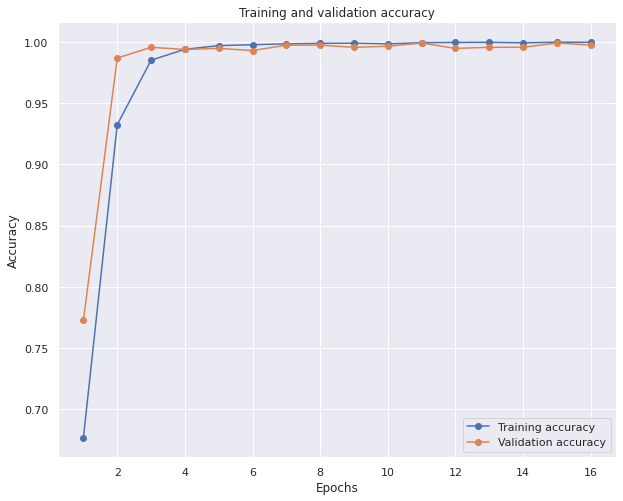

In [34]:
make_accuracy_plot(history)

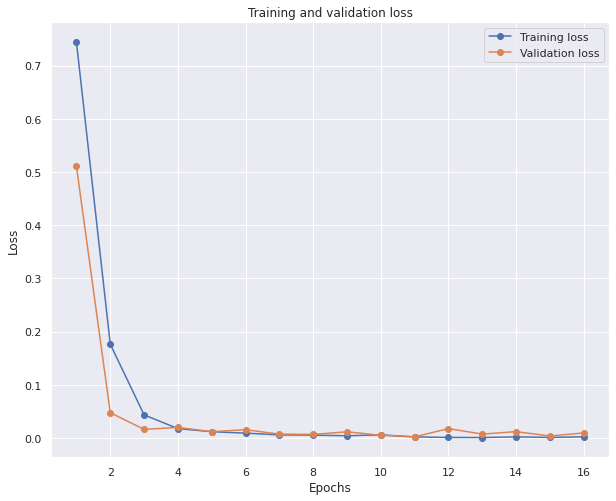

In [35]:
make_loss_plot(history)